<a href="https://colab.research.google.com/github/valeria-4673/Maths-for-ML-and-DS/blob/main/MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
!pip install -q tfds-nightly matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 42.7 MB/s eta 0:00:00


In [ ]:
dataset, info = tfds.load('smallnorb', with_info=True, as_supervised=True) # Dataset take from https://www.tensorflow.org/datasets/catalog/smallnorb . 5 categories
# as_supervised=True secures the model.fit receives tuples
# with_info=True to get metadata
# is loading like a dict, no tuples dataset['train'] would return {'image': <Tensor>, 'label': <int>}

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/smallnorb/incomplete.HKFWTF_2.0.0/smallnorb-train.tfrecord*...:   0%|     …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/smallnorb/incomplete.HKFWTF_2.0.0/smallnorb-test.tfrecord*...:   0%|      …

Dataset smallnorb downloaded and prepared to /root/tensorflow_datasets/smallnorb/2.0.0. Subsequent calls will reuse this data.


<Figure size 800x800 with 0 Axes>

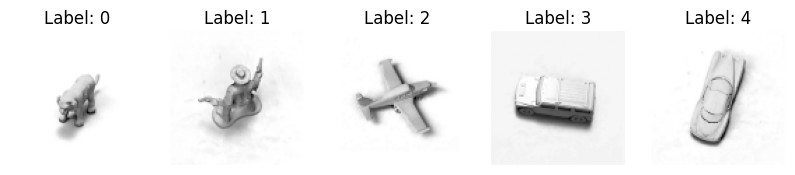

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize some examples from the train data
# select the test data
test_data = dataset['test']

# Create 2x2 subplot grid
plt.figure(figsize=(8, 8))

# Plot 5 examples, one of each category

selected = {}
for image, label in test_data:
    label_val = int(label.numpy())
    if label_val not in selected:
        selected[label_val] = image
    # Stop when we have all 5 labels
    if len(selected) == 5:
        break

# Plot them
plt.figure(figsize=(10, 2))
for i, (label_val, image) in enumerate(sorted(selected.items())):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f'Label: {label_val}')
    plt.axis('off')

plt.show()

plt.tight_layout()
plt.show()

In [ ]:
# General info
print("Total examples:", info.splits['train'].num_examples + info.splits['test'].num_examples,
      "Training set:", info.splits['train'].num_examples,
      "Test set:", info.splits['test'].num_examples)

print(image.dtype, tf.reduce_max(image), tf.reduce_min(image))# Normalizar soon

test_data = dataset['test']

Total examples: 48600 Training set: 24300 Test set: 24300
<dtype: 'uint8'> tf.Tensor(227, shape=(), dtype=uint8) tf.Tensor(84, shape=(), dtype=uint8)


In [ ]:
# Extract the tuples (image, labels) for the train and test sets

for example in test_data.take(1):
    print(example) # it yields a tuple, an image tensor normalized and a label is a scalar int 64

(<tf.Tensor: shape=(96, 96, 1), dtype=uint8, numpy=
array([[[206],
        [206],
        [206],
        ...,
        [206],
        [206],
        [206]],

       [[206],
        [206],
        [206],
        ...,
        [206],
        [206],
        [206]],

       [[206],
        [206],
        [206],
        ...,
        [206],
        [206],
        [206]],

       ...,

       [[205],
        [205],
        [205],
        ...,
        [205],
        [206],
        [206]],

       [[205],
        [205],
        [205],
        ...,
        [205],
        [206],
        [206]],

       [[206],
        [206],
        [206],
        ...,
        [206],
        [206],
        [206]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=3>)


In [ ]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Only normalize test_data
test_data = test_data.map(normalize)

for example in test_data.take(1):
    print(example)

(<tf.Tensor: shape=(96, 96, 1), dtype=float32, numpy=
array([[[0.80784315],
        [0.80784315],
        [0.80784315],
        ...,
        [0.80784315],
        [0.80784315],
        [0.80784315]],

       [[0.80784315],
        [0.80784315],
        [0.80784315],
        ...,
        [0.80784315],
        [0.80784315],
        [0.80784315]],

       [[0.80784315],
        [0.80784315],
        [0.80784315],
        ...,
        [0.80784315],
        [0.80784315],
        [0.80784315]],

       ...,

       [[0.8039216 ],
        [0.8039216 ],
        [0.8039216 ],
        ...,
        [0.8039216 ],
        [0.80784315],
        [0.80784315]],

       [[0.8039216 ],
        [0.8039216 ],
        [0.8039216 ],
        ...,
        [0.8039216 ],
        [0.80784315],
        [0.80784315]],

       [[0.80784315],
        [0.80784315],
        [0.80784315],
        ...,
        [0.80784315],
        [0.80784315],
        [0.80784315]]], dtype=float32)>, <tf.Tensor: shape=(), dtype=int64,

In [ ]:
# Use only the test set and separate it 80% train set (x_train), 20% test set (x_test)
split_size = int(24300 * 0.8)  # 19440
x_train = test_data.take(split_size)
x_test = test_data.skip(split_size)# skip function, it means you’re ignoring a certain number of elements from the beginning of the dataset

print( "Final examples in the train set:", len(x_train),
      "final examples in the test set:", len(x_test))

Final examples in the train set: 19440 final examples in the test set: 4860


In [ ]:
for _, label in x_train.take(1):
    print(label.shape)  # should be () not (5,)

()


In [ ]:
# Create the model

# Set random seed
tf.random.set_seed(29)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(96, 96, 1)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3), # 30% of neurons dropped during training
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation="softmax")
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                 metrics=["accuracy"])

# Fit the mode, feed it with the tuples and set up the batch
norm_history = model.fit(x_train.batch(64),
                         epochs=50,
                         validation_data= x_test.batch(64))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


304/304 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step - accuracy: 0.2456 - loss: 1.6522 - val_accuracy: 0.4922 - val_loss: 1.4795
Epoch 2/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3411 - loss: 1.4690 - val_accuracy: 0.4677 - val_loss: 1.3249
Epoch 3/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.3946 - loss: 1.3356 - val_accuracy: 0.5469 - val_loss: 1.1703
Epoch 4/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4136 - loss: 1.2673 - val_accuracy: 0.6444 - val_loss: 1.0719
Epoch 5/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4388 - loss: 1.2144 - val_accuracy: 0.6165 - val_loss: 1.0365
Epoch 6/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4675 - loss: 1.1685 - val_accuracy: 0.6461 - val_loss: 0.9995
Epoch 7/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4790 - loss: 1.1377 - val_accuracy: 0.6584 - val_loss: 0.9709
Epoch 8/50
304/304 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.4947 - loss: 1.1093 - val_accuracy

In [ ]:
# Evaluate the model on the test
loss_train, accur_train = model.evaluate(x_train.batch(64).prefetch(tf.data.AUTOTUNE))
loss_test, accur_test = model.evaluate(x_test.batch(64).prefetch(tf.data.AUTOTUNE))#  creating a buffer and using to prepare the next batch of data while
# the GPU is still busy with the current

print(f'Final accuracy training:{100*accur_train:.2f}%, final loss training {loss_train}')
print(f'Final accuracy test:{100*accur_test:.2f}%, final loss test {loss_test}')

304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7271 - loss: 0.7105
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7285 - loss: 0.7166
Final accuracy training:72.74%, final loss training 0.7125164270401001
Final accuracy test:72.53%, final loss test 0.7241033911705017


   accuracy      loss  val_accuracy  val_loss
0  0.272685  1.580374      0.492181  1.479541
1  0.355864  1.434195      0.467695  1.324894
2  0.399949  1.316468      0.546914  1.170274
3  0.419702  1.252774      0.644444  1.071943
4  0.446914  1.202539      0.616461  1.036460


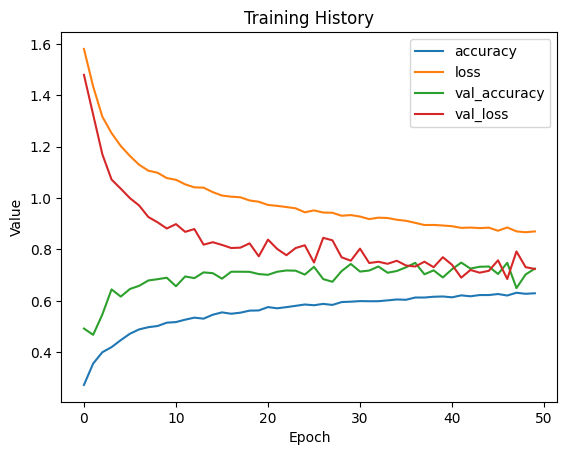

In [ ]:
import pandas as pd
history_df = pd.DataFrame(norm_history.history)# this is the df to be plotted
print(history_df.head(5))
history_df.plot(title="Training History")  # This will include accuracy, loss, val_accuracy, val_loss
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

In [ ]:
# Make predictions with the most recent model
y_probs = model.predict(x_test.batch(32))

# View the first 5 predictions
y_probs[:5]

152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[8.8843353e-02, 3.3389495e-03, 4.4638664e-01, 6.7467824e-02,
        3.9396316e-01],
       [3.2779163e-01, 5.8836091e-01, 8.3692193e-02, 1.1816325e-07,
        1.5513370e-04],
       [1.0585147e-03, 5.5379479e-07, 1.7774099e-01, 2.4002413e-01,
        5.8117574e-01],
       [6.0629600e-01, 7.8129552e-02, 2.9771024e-01, 4.0733113e-04,
        1.7456874e-02],
       [6.3280475e-01, 6.1177824e-02, 2.9638872e-01, 1.0211815e-04,
        9.5266234e-03]], dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([2, 1, 4, 0, 0, 2, 0, 1, 1, 0])

In [ ]:
# get the true labels from the tuples of the x_test

y_true = [label.numpy() for _, label in x_test]

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[808, 171,  29,   0,   9],
       [125, 878,   8,   0,   3],
       [314,  12, 563,   0,  65],
       [  0,   0,   1, 472, 453],
       [ 14,   2, 126,   3, 804]])

'Function adapted/taken from:1.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html,\n  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb\n  3. Tensorflow and DL with Python https://www.youtube.com/watch?v=tpCFfeUEGs8&ab_channel=DanielBourke '

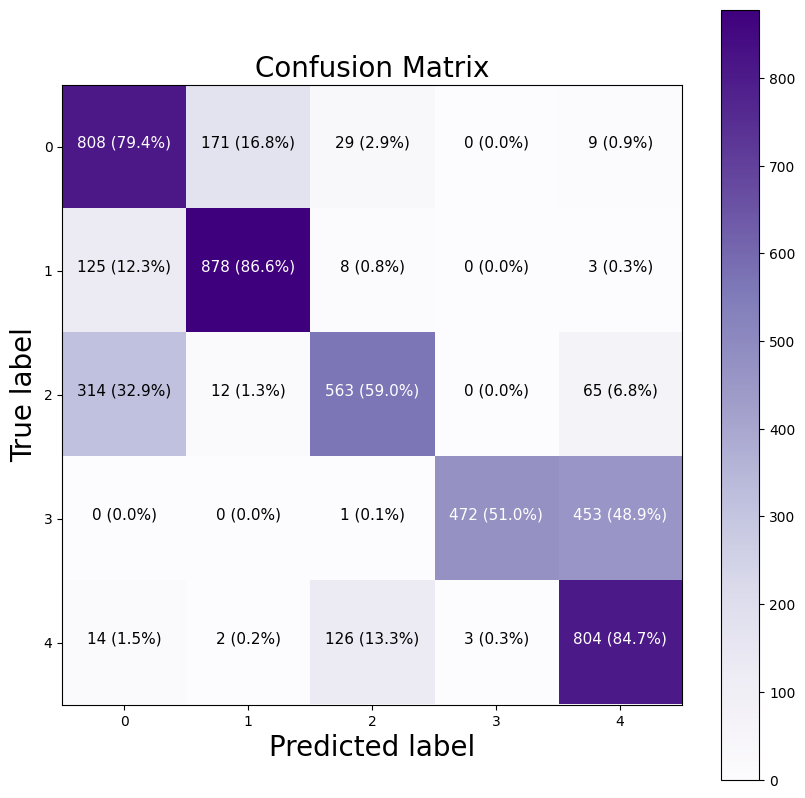

In [ ]:
# grafica de un img random con traduccion.
# Plot confusion matrix function
import itertools
import numpy as np

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_true, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it.
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Purples)
# ax.matshow() creates a matrix plot of the confusion matrix cm
fig.colorbar(cax) # Adds a color bar to the plot

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom() # move the x-axis ticks to the bottom of the plot

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
# range(cm.shape[0]) generates a range of row indices, and range(cm.shape[1]) generates a range of column indices. itertools.product creates a Cartesian product of these two ranges,
 # which means it generates all possible pairs of row and column indices
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             # This line of code is adding text annotations to the plot at the position (j, i).
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=11)
"""Function adapted/taken from:1.https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html,
  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  3. Tensorflow and DL with Python https://www.youtube.com/watch?v=tpCFfeUEGs8&ab_channel=DanielBourke """

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0. 0. 1. 0. 0.]]


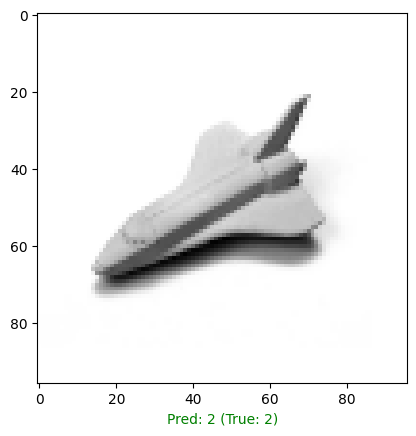

In [ ]:
def plot_random_image_from_dataset(model, dataset, classes):
    # Pick a random example
    dataset = dataset.shuffle(1000)  # shuffle to get randomness
    image, true_label = next(iter(dataset.take(1))) #  creates an iterator over this dataset.retrieves the next item from this iterator, which is a single batch of data.

    # Predict
    pred_probs = model.predict(image[None, ...])  # image[None, ...] changes the shape to (96, 96, 1). None creates a new axis of size 1.
    # image[None].shape is (1, 96, 96, 1)
    # shorthand for writing out all the slices explicitly, i.e. image[None, :, :, :]
    # image[None, ...] → (1, 96, 96, 1)
    print(pred_probs)

    pred_label = classes[pred_probs.argmax()]

    plt.imshow(image.numpy().squeeze(), cmap='gray')

    color = "green" if pred_label == classes[true_label.numpy()] else "red"
    plt.xlabel(f"Pred: {pred_label}"
              f"(True: {classes[true_label.numpy()]})", color=color)
    plt.show()

# Call it
plot_random_image_from_dataset(model, test_data, classes=[0, 1, 2, 3, 4])